**MAKEMORE: An autoregressive character-level language model**

We will use **Bigrams and MLP** in this notebook.

Name: **Lakshit Sethia**

Roll No.: **210102123**

DA623: Final Project

In this we are basically going to do next-prediction based on characters. So for each letter, we will be providing a large dataset of names of people, and it will be able to generate many more related names.





**Reading and exploring the dataset**

I have created a dataset containing Indian Names by combining and refining multiple datasets. The final data is in the file ***names.txt***.

[1] www.kaggle.com/datasets/ananysharma/indian-names-dataset

[2] www.kaggle.com/datasets/jasleensondhi/indian-names-corpus-nltk-data

[3] www.kaggle.com/datasets/shubhamuttam/indian-names-by-gender


In [ ]:
words = open('names.txt', 'r').read().splitlines()

In [ ]:
words[:10]

['aaban',
 'aabharan',
 'aabhas',
 'aabhat',
 'aabheer',
 'abheer',
 'aabher',
 'aabi',
 'aabilesh',
 'aabir']

In [ ]:
len(words)

53982

In [ ]:
min(len(word) for word in words)

2

In [ ]:
max(len(word) for word in words)

24

#Bigram

**Exploring the bigrams in the dataset**

Two columns are formed where The first character is taken and is zipped with its next one. So when there is only one character left, then it exits.




In [ ]:
for word in words[:1]:  #Example
    for ch1, ch2 in zip(word, word[1:]):
        print(ch1, ch2)

a a
a b
b a
a n


Here we are just adding our own set of characters in the list, so as to get like this custom output - Labelling the first and the last character of the word

In [ ]:
for word in words[:1]:
    chs = ['<S>'] + list(word) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        print(ch1, ch2)

<S> a
a a
a b
b a
a n
n <E>


In [ ]:
for word in words[:3]:
    chs = ['<S>'] + list(word) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        print(ch1, ch2)

<S> a
a a
a b
b a
a n
n <E>
<S> a
a a
a b
b h
h a
a r
r a
a n
n <E>
<S> a
a a
a b
b h
h a
a s
s <E>


**Counting bigrams in a python dictionary**

We have created a dictionary 'b' - First data structure.

Then we have created a set 'bigram' which is just a set of two characters - Second data structure.

Here we are adding it to the dictionary 'b', where the key is 'bigram' (which is a set of character pairs) has the value counts of the set occoured (The number of times that set has occured).

In [ ]:
b = {}  #dictionary 'b'
for word in words[:1]:
    chs = ['<S>'] + list(word) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2) #bigram
        b[bigram] = b.get(bigram, 0) + 1
        print(ch1, ch2)

<S> a
a a
a b
b a
a n
n <E>


**Note:**   \
`b.get(bigram)` is the same as `b[bigram]`  \
Just that here: `b.get(bigram, 0)` if we don't get a bigram value, we want it to assign to 0    \
Finally we are adding one `+1` as we want to count the occurance.

In [ ]:
b

{('<S>', 'a'): 1,
 ('a', 'a'): 1,
 ('a', 'b'): 1,
 ('b', 'a'): 1,
 ('a', 'n'): 1,
 ('n', '<E>'): 1}

In [ ]:
b = {}
for word in words[:3]:
    chs = ['<S>'] + list(word) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1
        print(ch1, ch2)

<S> a
a a
a b
b a
a n
n <E>
<S> a
a a
a b
b h
h a
a r
r a
a n
n <E>
<S> a
a a
a b
b h
h a
a s
s <E>


In [ ]:
b

{('<S>', 'a'): 3,
 ('a', 'a'): 3,
 ('a', 'b'): 3,
 ('b', 'a'): 1,
 ('a', 'n'): 2,
 ('n', '<E>'): 2,
 ('b', 'h'): 2,
 ('h', 'a'): 2,
 ('a', 'r'): 1,
 ('r', 'a'): 1,
 ('a', 's'): 1,
 ('s', '<E>'): 1}

In [ ]:
b = {}
for word in words:
    chs = ['<S>'] + list(word) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

# b

We know 'b' is a dictionary. So .items() basically gives us that it's values in a (Key, Value) set

In [ ]:
b.items()

dict_items([(('<S>', 'a'), 6476), (('a', 'a'), 4483), (('a', 'b'), 1431), (('b', 'a'), 1747), (('a', 'n'), 25646), (('n', '<E>'), 13513), (('b', 'h'), 1283), (('h', 'a'), 18167), (('a', 'r'), 10752), (('r', 'a'), 10543), (('a', 's'), 5382), (('s', '<E>'), 458), (('a', 't'), 5185), (('t', '<E>'), 1088), (('h', 'e'), 2381), (('e', 'e'), 4232), (('e', 'r'), 1126), (('r', '<E>'), 1584), (('b', 'i'), 916), (('i', '<E>'), 8863), (('i', 'l'), 2118), (('l', 'e'), 620), (('e', 's'), 3516), (('s', 'h'), 14246), (('h', '<E>'), 4551), (('i', 'r'), 2754), (('i', 's'), 4328), (('a', 'y'), 2714), (('y', 'a'), 7506), (('a', 'c'), 303), (('c', 'h'), 1718), (('r', 'y'), 311), (('a', '<E>'), 16312), (('h', 'm'), 465), (('m', 'a'), 5546), (('h', 'u'), 2497), (('u', 't'), 1225), (('t', 'h'), 15185), (('a', 'd'), 2117), (('d', 'a'), 1791), (('a', 'l'), 3842), (('l', 'a'), 4496), (('a', 'g'), 1544), (('g', 'a'), 2754), (('s', 'a'), 4203), (('a', 'z'), 232), (('z', 'h'), 384), (('a', 'm'), 3845), (('m', 'y'),

Now this by default sorts the values based on the Key

In [ ]:
sorted(b.items())

[(('<S>', 'a'), 6476),
 (('<S>', 'b'), 1698),
 (('<S>', 'c'), 1034),
 (('<S>', 'd'), 2965),
 (('<S>', 'e'), 685),
 (('<S>', 'f'), 137),
 (('<S>', 'g'), 1430),
 (('<S>', 'h'), 1648),
 (('<S>', 'i'), 897),
 (('<S>', 'j'), 2502),
 (('<S>', 'k'), 4233),
 (('<S>', 'l'), 1350),
 (('<S>', 'm'), 3849),
 (('<S>', 'n'), 3551),
 (('<S>', 'o'), 209),
 (('<S>', 'p'), 3289),
 (('<S>', 'q'), 16),
 (('<S>', 'r'), 3353),
 (('<S>', 's'), 5140),
 (('<S>', 't'), 2909),
 (('<S>', 'u'), 640),
 (('<S>', 'v'), 4106),
 (('<S>', 'w'), 95),
 (('<S>', 'x'), 1),
 (('<S>', 'y'), 1644),
 (('<S>', 'z'), 125),
 (('a', '<E>'), 16312),
 (('a', 'a'), 4483),
 (('a', 'b'), 1431),
 (('a', 'c'), 303),
 (('a', 'd'), 2117),
 (('a', 'e'), 500),
 (('a', 'f'), 47),
 (('a', 'g'), 1544),
 (('a', 'h'), 1697),
 (('a', 'i'), 2053),
 (('a', 'j'), 2075),
 (('a', 'k'), 2908),
 (('a', 'l'), 3842),
 (('a', 'm'), 3845),
 (('a', 'n'), 25646),
 (('a', 'o'), 21),
 (('a', 'p'), 793),
 (('a', 'q'), 6),
 (('a', 'r'), 10752),
 (('a', 's'), 5382),


 Now, here we are specifying we want to sort based on the values. So we select the key, then in the lambda function, we take the keyvalue (kv) and select the second element in the set, which is what we want
 - sign is for descending

In [ ]:
sorted(b.items(), key= lambda kv: -kv[1])

[(('a', 'n'), 25646),
 (('h', 'a'), 18167),
 (('a', '<E>'), 16312),
 (('t', 'h'), 15185),
 (('s', 'h'), 14246),
 (('n', '<E>'), 13513),
 (('a', 'r'), 10752),
 (('r', 'a'), 10543),
 (('i', '<E>'), 8863),
 (('h', 'i'), 8170),
 (('n', 'a'), 7889),
 (('y', 'a'), 7506),
 (('n', 'i'), 6941),
 (('k', 'a'), 6619),
 (('<S>', 'a'), 6476),
 (('v', 'a'), 6045),
 (('m', 'a'), 5546),
 (('a', 's'), 5382),
 (('a', 't'), 5185),
 (('i', 'n'), 5154),
 (('<S>', 's'), 5140),
 (('r', 'i'), 4935),
 (('i', 't'), 4881),
 (('h', '<E>'), 4551),
 (('l', 'a'), 4496),
 (('a', 'a'), 4483),
 (('v', 'i'), 4469),
 (('i', 's'), 4328),
 (('<S>', 'k'), 4233),
 (('e', 'e'), 4232),
 (('s', 'a'), 4203),
 (('<S>', 'v'), 4106),
 (('<S>', 'm'), 3849),
 (('a', 'm'), 3845),
 (('a', 'l'), 3842),
 (('a', 'v'), 3635),
 (('<S>', 'n'), 3551),
 (('e', 's'), 3516),
 (('<S>', 'r'), 3353),
 (('j', 'a'), 3343),
 (('i', 'k'), 3324),
 (('<S>', 'p'), 3289),
 (('d', 'h'), 3034),
 (('n', 't'), 3025),
 (('e', 'n'), 3011),
 (('<S>', 'd'), 2965),


**Counting bigrams in a 2D torch tensor ("training the model")**

In [ ]:
import torch

In [ ]:
N = torch.zeros((28, 28), dtype = torch.int32)

In [ ]:
chars = sorted(list(set(''.join(words))))

stoi = {s:i for i,s in enumerate(chars)}
stoi['<S>'] = 26
stoi['<E>'] = 27

In [ ]:
stoi

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25,
 '<S>': 26,
 '<E>': 27}

In [ ]:
for word in words:
    chs = ['<S>'] + list(word) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

In [ ]:
N

tensor([[ 4483,  1431,   303,  2117,   500,    47,  1544,  1697,  2053,  2075,
          2908,  3842,  3845, 25646,    21,   793,     6, 10752,  5382,  5185,
           252,  3635,   153,    59,  2714,   232,     0, 16312],
        [ 1747,    35,     0,    11,   299,     0,     1,  1283,   916,     7,
             0,     9,     0,     6,   121,     2,     0,   239,     7,     6,
           211,     0,     1,     0,    42,     1,     0,    81],
        [  203,     0,    15,     0,    26,     0,     0,  1718,    59,     0,
           116,     6,     0,     1,    23,     0,     0,     4,     4,     3,
             7,     0,     0,     0,    25,     0,     0,    18],
        [ 1791,     8,    30,   118,  1324,     0,    10,  3034,  1071,     3,
             6,    10,    84,    30,    62,     1,     0,   789,    34,    14,
           485,    53,    51,     0,   118,     1,     0,   363],
        [  202,   190,    21,   278,  4232,     7,   248,   294,   142,   146,
           606,  1060,   

**Visualizing the bigram tensor**

In [ ]:
itos = {i:s for s,i in stoi.items()}
itos

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'j',
 10: 'k',
 11: 'l',
 12: 'm',
 13: 'n',
 14: 'o',
 15: 'p',
 16: 'q',
 17: 'r',
 18: 's',
 19: 't',
 20: 'u',
 21: 'v',
 22: 'w',
 23: 'x',
 24: 'y',
 25: 'z',
 26: '<S>',
 27: '<E>'}

Bigram Plot

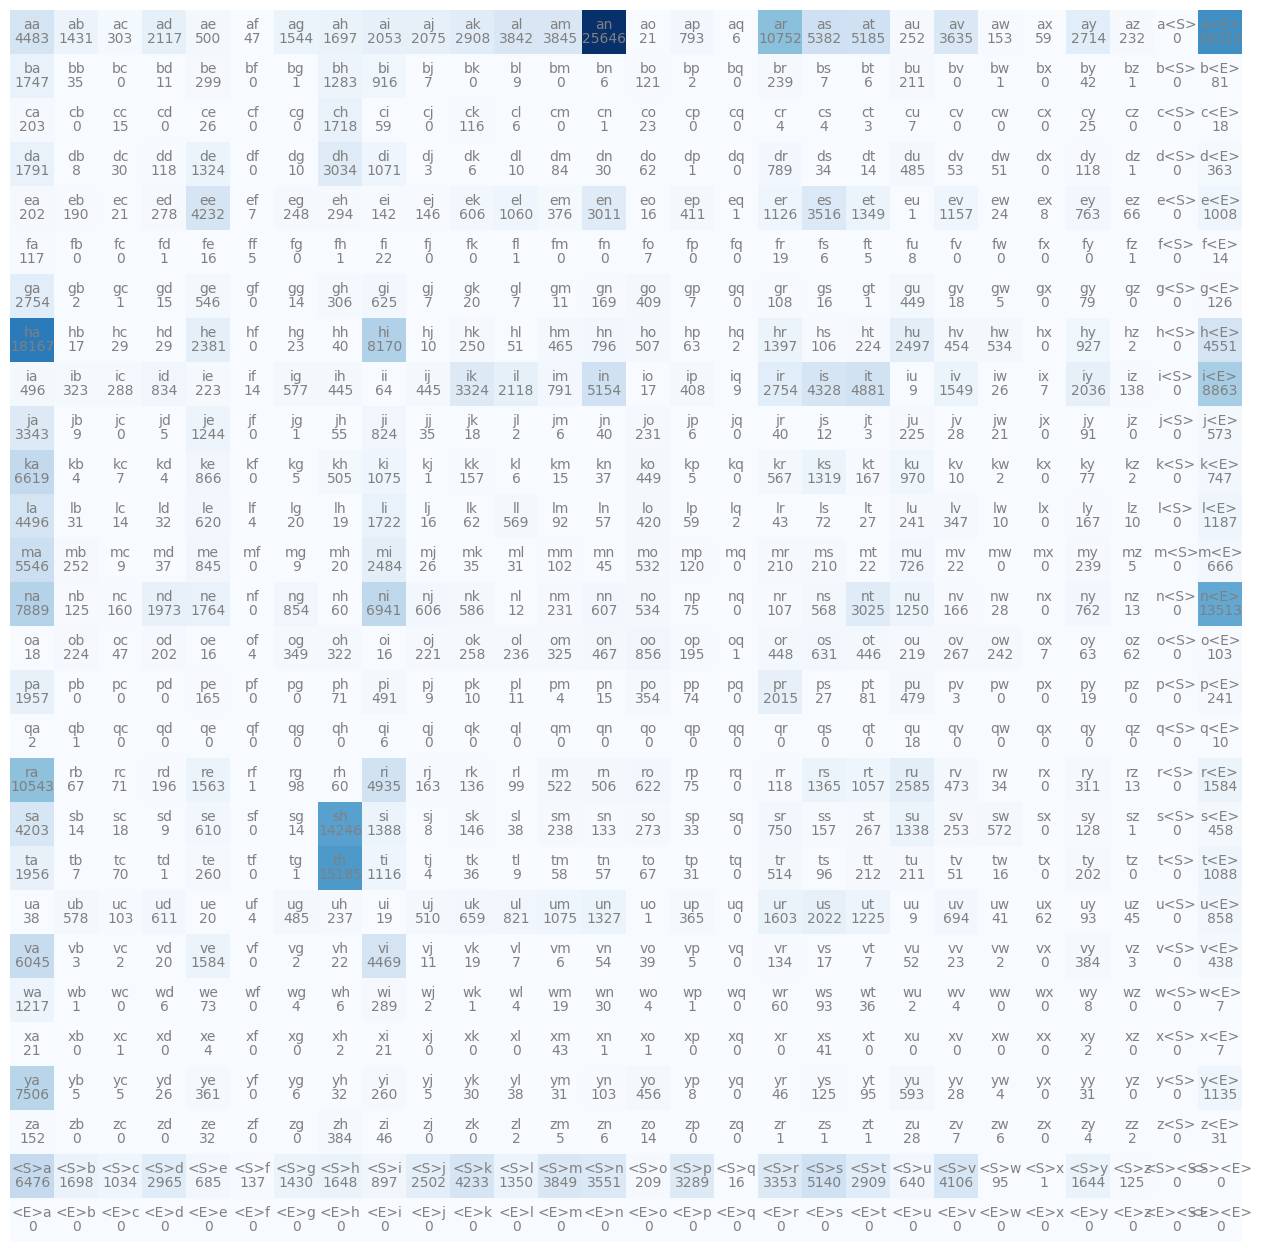

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(28):
    for j in range(28):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

**Deleting spurious (S) and (E) tokens in favor of a single . token**

In [ ]:
N = torch.zeros((27, 27), dtype = torch.int32)

chars = sorted(list(set(''.join(words))))

stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0

In [ ]:
itos = {i:s for s,i in stoi.items()}

In [ ]:
for word in words:
    chs = ['.'] + list(word) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

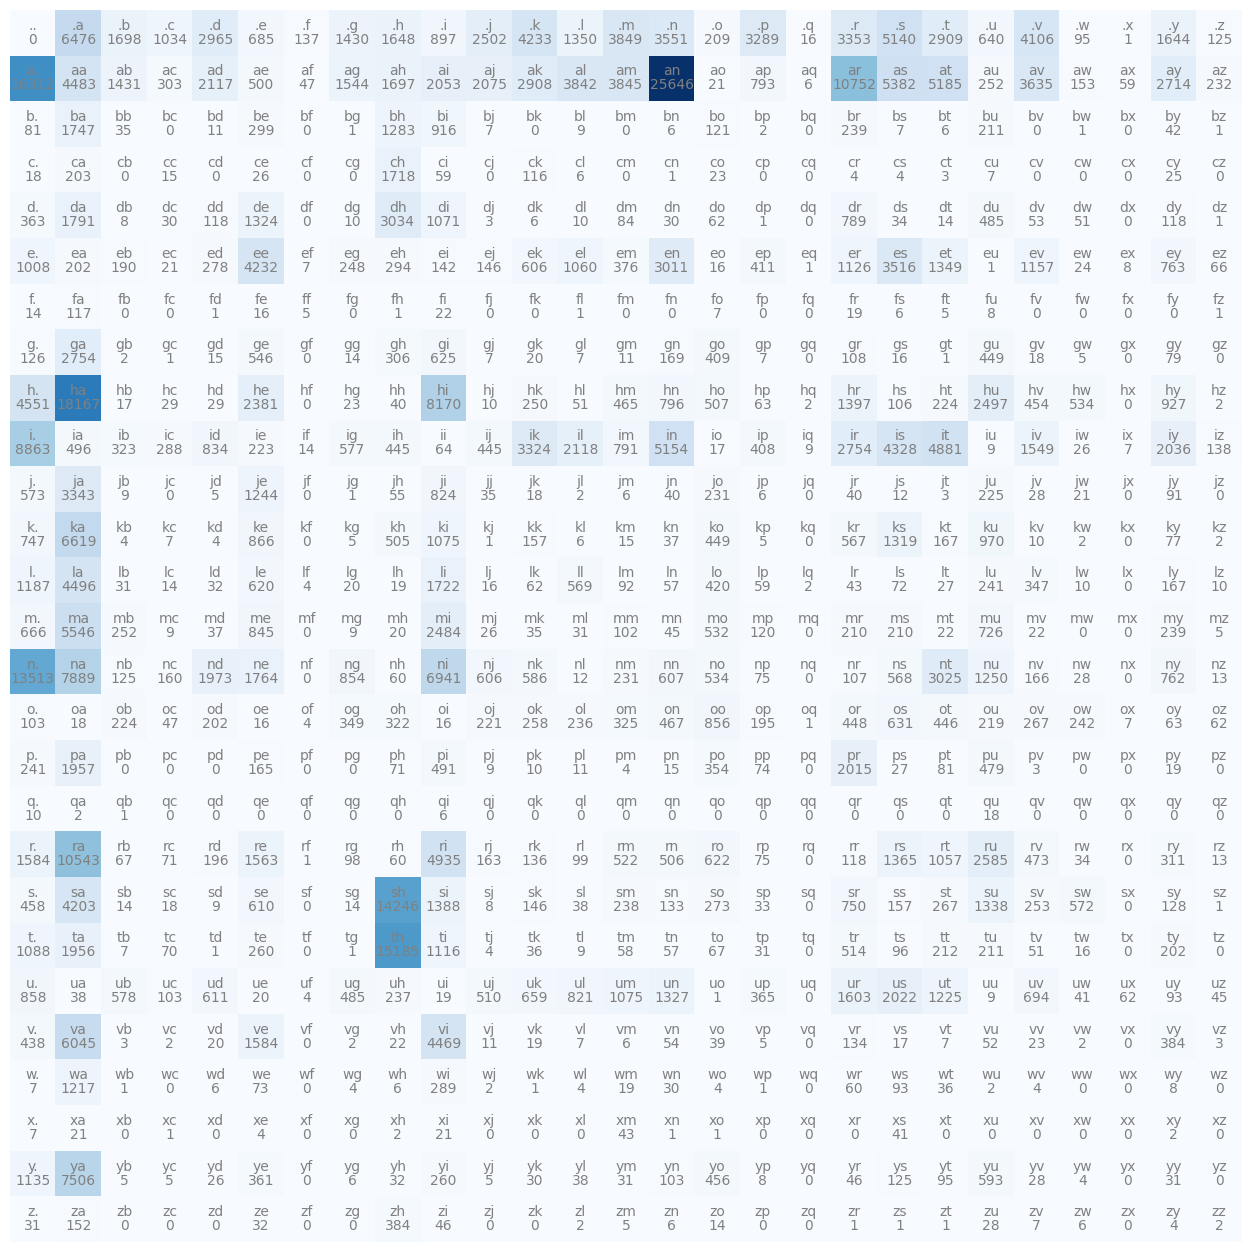

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

**Sampling from the model**

In [ ]:
N[0]    #Viewing just the first row

tensor([   0, 6476, 1698, 1034, 2965,  685,  137, 1430, 1648,  897, 2502, 4233,
        1350, 3849, 3551,  209, 3289,   16, 3353, 5140, 2909,  640, 4106,   95,
           1, 1644,  125], dtype=torch.int32)

First we make them all into float. \
Then we make a probability distribution \
We do that by dividing `p` with `p.sum()`

In [ ]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000e+00, 1.1997e-01, 3.1455e-02, 1.9155e-02, 5.4926e-02, 1.2689e-02,
        2.5379e-03, 2.6490e-02, 3.0529e-02, 1.6617e-02, 4.6349e-02, 7.8415e-02,
        2.5008e-02, 7.1302e-02, 6.5781e-02, 3.8717e-03, 6.0928e-02, 2.9640e-04,
        6.2113e-02, 9.5217e-02, 5.3888e-02, 1.1856e-02, 7.6062e-02, 1.7598e-03,
        1.8525e-05, 3.0455e-02, 2.3156e-03])

In [ ]:
p.sum().item()

1.0

So the total probability sums up to 1. Therefore now we have the probability values for each of those characters.

In [ ]:
g = torch.Generator().manual_seed(210102123)
p = torch.rand(3, generator=g)
p = p / p.sum()
p

tensor([0.2978, 0.1591, 0.5431])

In [ ]:
torch.multinomial(p, num_samples=20, replacement=True, generator=g)

tensor([2, 2, 2, 2, 2, 0, 2, 1, 0, 2, 2, 2, 0, 1, 2, 2, 1, 1, 1, 2])

So based on the probability percentages `p` we get a bunch of sample values \
So `0` should be 60%, `1` should be 30%, `2` should be 10% of the total samples generated

In [ ]:
g = torch.Generator().manual_seed(210102123)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'.'

So now, if we had got another sampled value, lets say 'm' (so we have taken the column), now we go to the row containing 'm' and then check for its correspondant character.    \
\
Keeping this jest in mind, we will be making this into a loop.

In [ ]:
g = torch.Generator().manual_seed(210102123)

for i in range(10):
    out = []
    ix = 0
    while True:
        p = N[ix].float()
        p = p / p.sum()
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

rn.
thiranipadanuli.
va.
jonsh.
shahash.
jat.
sga.
adh.
thasacaya.
huta.


And this is why the Bigram model is so bad lol. The output generated not to great (Andrej said "terrible" xd), for example for `p.` , is that the model doesn't understand that 'p' should have had something before or after it. Right now, it considers that as a name itself.

But now we will see why the output made by the model is not exactly too terrible

In [ ]:
g = torch.Generator().manual_seed(210102123)

for i in range(10):
    out = []
    ix = 0
    while True:
        # p = N[ix].float()
        # p = p / p.sum()
        p = torch.ones(27) / 27.0
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

rn.
tnpxcpjpsdtculzxv.
bjoqlrk.
vchasgzjutfsgpgaq.
.
trazqctyufhztu.
dhu.
owyztrzwincpvveazacxdrcxekcsrkdkc.
akhkpvorhnz.
slloccmphroeowwrhiplkwbuohtlrgngfz.


So now this is what we get when the model is completely untrained, it gives you a garbage of values.

This is happening because we removed the probability distribution and added a distribution of uniform values. So all of the characters are equally likely to occur.

So yeah, if we train it with a Bigram, then its a lot better output. So ultimately it is actually working, just that Bigram is not so great for this.

In [ ]:
#Solving the inefficiency problem
P = N.float()
P = P / P.sum(1, keepdim=True) #Here is where we are applying the sum and broadcasting rules. Sum for the function and Broadcasting for the division part that takes place.

# 27 27
# 27  1

In [ ]:
P[0].sum() #This should return the tensor object with value 1. So that entire row as been normalised

tensor(1.)

So the rule says:
Two tensors are broadcastable if the following rules hold:

Each tensor has at least one dimension.

When iterating over the dimension sizes, starting at the trailing dimension, the dimension sizes must either be equal, one of them is 1, or one of them does not exist.

In [ ]:
g = torch.Generator().manual_seed(210102123)

for i in range(10):
    out = []
    ix = 0
    while True:
        p = P[ix]
        # p = N[ix].float()
        # p = p / p.sum()
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

rn.
thiranipadanuli.
va.
jonsh.
shahash.
jat.
sga.
adh.
thasacaya.
huta.


In [ ]:
P = N.float()
P /= P.sum(1, keepdim=True)

In [ ]:
g = torch.Generator().manual_seed(210102123)

for i in range(10):
    out = []
    ix = 0
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

rn.
thiranipadanuli.
va.
jonsh.
shahash.
jat.
sga.
adh.
thasacaya.
huta.


--------------

**Evaluating our model**

In [ ]:
import torch

In [ ]:
N = torch.zeros((27, 27), dtype=torch.int32)

chars = sorted(list(set(''.join(words))))

stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0

In [ ]:
itos = {i:s for s,i in stoi.items()}

In [ ]:
for word in words:
  chs = ['.'] + list(word) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1

In [ ]:
P = N.float()
P /= P.sum(1, keepdim=True)

**Likelihood**: The probability of observing the data given the model.

**Log-likelihood**: The natural logarithm of the likelihood.

**Negative Log-likelihood (NLL)**: The negative of the log-likelihood

In [ ]:
log_likelihood = 0.0
n = 0

for word in words[:3]:
    chs = ['.'] + list(word) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2] #Likelihood - product of all the values
        logprob = torch.log(prob) #Log Likelihood
        log_likelihood += logprob #Log Likelihood - Adding the logs of all probability values
        n += 1 #Log Likelihood - For the average
        print(f'{ch1}{ch2}: {prob:.4f} {logprob: .4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood #Negative Log Likelihood
print(f'{nll=}')
print(f'{nll/n}') #Negative Log Likelihood - Average value

.a: 0.1199 -2.1209
aa: 0.0457 -3.0846
ab: 0.0146 -4.2260
ba: 0.3460 -1.0613
an: 0.2617 -1.3407
n.: 0.3227 -1.1310
.a: 0.1199 -2.1209
aa: 0.0457 -3.0846
ab: 0.0146 -4.2260
bh: 0.2542 -1.3698
ha: 0.4355 -0.8313
ar: 0.1097 -2.2099
ra: 0.3873 -0.9485
an: 0.2617 -1.3407
n.: 0.3227 -1.1310
.a: 0.1199 -2.1209
aa: 0.0457 -3.0846
ab: 0.0146 -4.2260
bh: 0.2542 -1.3698
ha: 0.4355 -0.8313
as: 0.0549 -2.9019
s.: 0.0181 -4.0104
log_likelihood=tensor(-48.7721)
nll=tensor(48.7721)
2.2169153690338135


Model smoothening

In [ ]:
P = (N+1).float()
P /= P.sum(1, keepdim=True)

In [ ]:
log_likelihood = 0.0
n = 0

# for word in words[:3]:
for word in ["lakshit"]:
    chs = ['.'] + list(word) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2] #Likelihood - product of all the values
        logprob = torch.log(prob) #Log Likelihood
        log_likelihood += logprob #Log Likelihood - Adding the logs of all probability values
        n += 1 #Log Likelihood - For the average
        print(f'{ch1}{ch2}: {prob:.4f} {logprob: .4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood #Negative Log Likelihood
print(f'{nll=}')
print(f'{nll/n}') #Negative Log Likelihood - Average value


.l: 0.0250 -3.6883
la: 0.4338 -0.8351
ak: 0.0297 -3.5173
ks: 0.0968 -2.3356
sh: 0.5626 -0.5751
hi: 0.1959 -1.6304
it: 0.1216 -2.1070
t.: 0.0512 -2.9723
log_likelihood=tensor(-17.6611)
nll=tensor(17.6611)
2.2076382637023926


Here, we arrived at the model doing everything explicitly. We were performing counts and we were normalizing those counts.

Now, we'll be doing an alternative approach but the final output will be the same.

**Here we are going to cast the problem of Bigram Character level language modelling into a neural network**

So our NN will still be a character level language model.

So we have an input character -> given to the neural network and then it is gonna predict the probability -> of the next character that is likely to follow.

And in addition to that, we are going to be able to evaluate any setting of the parameters of the langauage model, because we have a loss function value (The NLL).

So we are going to look at the probability distributions and we are going to look at its labels (in the NN) which are basically the identity of the next character in the Bigram.

So knowing what character comes next is the bigram, allows us to check what will be the probability value assigned to that character (So higher the value, the better. Because it is another way of saying that the loss is low).

**We're gonna use gradient based optimization to tune the parameters of this network.**
Because we have a loss function and we're gonna minimize it.
We're gonna tune the weights, so that the NN is gonna correctly predict the next probability of the next characters.

In [ ]:
#Creating the training set of bigrams (x,y)
xs, ys = [], []

for word in words[:1]:
    chs = ['.'] + list(word) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

. a
a a
a b
b a
a n
n .


In [ ]:
xs

tensor([ 0,  1,  1,  2,  1, 14])

In [ ]:
ys

tensor([ 1,  1,  2,  1, 14,  0])

Feeding these examples into a neural network

In [ ]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float() #IMP: manual type casting
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
xenc.shape

torch.Size([6, 27])

In [ ]:
import matplotlib.pyplot as plt

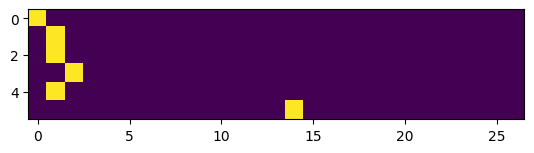

In [ ]:
plt.imshow(xenc)

In [ ]:
W = torch.randn((27, 27))   #Generating the weights
xenc @ W    #Doing matrix multiplication

tensor([[-1.1317e+00, -8.3872e-01,  1.8469e+00,  1.8177e+00,  7.9939e-01,
          3.2233e-01,  4.8894e-01, -3.6891e-01, -4.7443e-01,  1.4538e+00,
         -1.2818e+00,  9.4315e-01, -2.5712e+00,  9.6699e-01,  1.4254e+00,
          2.0093e+00,  1.1613e+00,  4.7661e-02,  3.1415e-01,  9.1409e-01,
          5.1511e-01,  1.6708e+00, -1.1048e+00, -2.4267e-01, -7.9311e-01,
          6.7228e-01,  3.7798e-01],
        [ 3.5680e-01,  4.3664e-01,  1.6017e+00, -4.6318e-01,  1.4369e+00,
         -5.2422e-01,  6.8728e-02, -2.0505e+00,  7.3914e-02,  1.2932e+00,
         -5.5189e-01,  1.2871e-01,  9.8873e-01, -4.5926e-01,  1.7543e+00,
          9.2666e-01,  9.2280e-01, -6.1509e-01, -1.1672e+00,  1.3255e+00,
          1.2726e+00, -1.7190e+00,  6.1138e-02, -1.7477e+00, -1.9487e+00,
          6.1195e-01,  1.1273e+00],
        [ 3.5680e-01,  4.3664e-01,  1.6017e+00, -4.6318e-01,  1.4369e+00,
         -5.2422e-01,  6.8728e-02, -2.0505e+00,  7.3914e-02,  1.2932e+00,
         -5.5189e-01,  1.2871e-01,  9.88

In [ ]:
logits = xenc @ W   #log-counts
counts = logits.exp()   #equivalent to N matrix as before
probs = counts / counts.sum(1, keepdims=True)   #Normalising the rows (To calculate the probability)
probs

tensor([[0.0053, 0.0070, 0.1034, 0.1004, 0.0363, 0.0225, 0.0266, 0.0113, 0.0101,
         0.0698, 0.0045, 0.0419, 0.0012, 0.0429, 0.0678, 0.1216, 0.0521, 0.0171,
         0.0223, 0.0407, 0.0273, 0.0867, 0.0054, 0.0128, 0.0074, 0.0319, 0.0238],
        [0.0287, 0.0311, 0.0996, 0.0126, 0.0845, 0.0119, 0.0215, 0.0026, 0.0216,
         0.0732, 0.0116, 0.0228, 0.0540, 0.0127, 0.1160, 0.0507, 0.0505, 0.0109,
         0.0062, 0.0756, 0.0717, 0.0036, 0.0213, 0.0035, 0.0029, 0.0370, 0.0620],
        [0.0287, 0.0311, 0.0996, 0.0126, 0.0845, 0.0119, 0.0215, 0.0026, 0.0216,
         0.0732, 0.0116, 0.0228, 0.0540, 0.0127, 0.1160, 0.0507, 0.0505, 0.0109,
         0.0062, 0.0756, 0.0717, 0.0036, 0.0213, 0.0035, 0.0029, 0.0370, 0.0620],
        [0.0196, 0.0325, 0.0034, 0.0535, 0.0065, 0.0250, 0.0246, 0.0239, 0.0693,
         0.0720, 0.0553, 0.0636, 0.0454, 0.0210, 0.0501, 0.0325, 0.0186, 0.0383,
         0.0710, 0.0247, 0.0434, 0.0062, 0.0687, 0.1066, 0.0148, 0.0035, 0.0057],
        [0.0287, 0.0311,

-------------

In [ ]:
xs

tensor([ 0,  1,  1,  2,  1, 14])

In [ ]:
ys

tensor([ 1,  1,  2,  1, 14,  0])

Randomly initialize 27 neurons' weights. each neuron receives 27 inputs

In [ ]:
g = torch.Generator().manual_seed(210102123)
W = torch.randn((27, 27), generator=g)

Input to the network: one-hot encoding

In [ ]:
xenc = F.one_hot(xs, num_classes=27).float()
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character

the last 2 lines here are together called a 'softmax'

In [ ]:
probs.shape

torch.Size([6, 27])

In [ ]:
nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .a (indexes 0,1)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0247, 0.0299, 0.0099, 0.0177, 0.0234, 0.0168, 0.0158, 0.0163, 0.0068,
        0.0106, 0.0028, 0.0115, 0.1115, 0.1343, 0.0173, 0.0390, 0.0405, 0.0267,
        0.1440, 0.0390, 0.0387, 0.0124, 0.0279, 0.0182, 0.0079, 0.0492, 0.1070])
label (actual next character): 1
probability assigned by the net to the the correct character: 0.029896218329668045
log likelihood: -3.510023355484009
negative log likelihood: 3.510023355484009
--------
bigram example 2: aa (indexes 1,1)
input to the neural net: 1
output probabilities from the neural net: tensor([0.0208, 0.0084, 0.0075, 0.0140, 0.0106, 0.0104, 0.0042, 0.0309, 0.0495,
        0.0449, 0.0153, 0.0603, 0.0634, 0.0365, 0.0064, 0.1454, 0.0084, 0.1155,
        0.0231, 0.2097, 0.0121, 0.0116, 0.0189, 0.0267, 0.0203, 0.0035, 0.0216])
label (actual next character): 1
probability assigned by the net to the the correct character: 0.0

In [ ]:
import torch.nn.functional as F

**OPTIMIZATION**

In [ ]:
xs

tensor([ 0,  1,  1,  2,  1, 14])

In [ ]:
ys

tensor([ 1,  1,  2,  1, 14,  0])

Adding the third parameter here (requires_grad=True) for the Backward pass

In [ ]:
g = torch.Generator().manual_seed(210102123)
W = torch.randn((27, 27), generator=g, requires_grad=True)

FORWARD PASS

In [ ]:
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -probs[torch.arange(len(ys)), ys].log().mean()
# torch.arange(5) is basically 0 to 5(4) position, ys is from that tuple list
# We calculate the probability values of that
# Then we take their log values
# Then we take their mean
# Finally take the negative value (since NLL)

In [ ]:
loss

tensor(4.3108, grad_fn=<NegBackward0>)

BACKWARD PASS

In [ ]:
W.grad = None
loss.backward()

In [ ]:
W.grad.shape

torch.Size([27, 27])

In [ ]:
W.grad

tensor([[ 0.0041, -0.1617,  0.0017,  0.0030,  0.0039,  0.0028,  0.0026,  0.0027,
          0.0011,  0.0018,  0.0005,  0.0019,  0.0186,  0.0224,  0.0029,  0.0065,
          0.0067,  0.0044,  0.0240,  0.0065,  0.0065,  0.0021,  0.0047,  0.0030,
          0.0013,  0.0082,  0.0178],
        [ 0.0104, -0.1624, -0.1629,  0.0070,  0.0053,  0.0052,  0.0021,  0.0155,
          0.0248,  0.0224,  0.0077,  0.0302,  0.0317,  0.0182, -0.1635,  0.0727,
          0.0042,  0.0577,  0.0116,  0.1049,  0.0060,  0.0058,  0.0095,  0.0134,
          0.0102,  0.0018,  0.0108],
        [ 0.0104, -0.1631,  0.0057,  0.0026,  0.0032,  0.0018,  0.0007,  0.0020,
          0.0134,  0.0032,  0.0041,  0.0187,  0.0032,  0.0217,  0.0002,  0.0226,
          0.0030,  0.0054,  0.0075,  0.0067,  0.0044,  0.0018,  0.0025,  0.0023,
          0.0066,  0.0036,  0.0057],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000

UPDATE


In [ ]:
W.data += -0.1 * W.grad

JUST PUTTING THEM TOGETHER TO PERFORM GRADIENT DESCENT

In [ ]:
#ONLY RUN THIS THE FIRST TIME
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(210102123)
W = torch.randn((27, 27), generator=g, requires_grad=True) #Adding the third parameter here for the Backward pass (as remember in micrograd we had done the same thing)

In [ ]:
#FORWARD PASS
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -probs[torch.arange(len(ys)), ys].log().mean() #torch.arange(5) is basically 0 to 5(4) position, ys is from that tuple list | We calculate the probability values of that | Then we take their log values | Then we take their mean | Finally take the negative value (since NLL)

In [ ]:
print(loss.item()) #CHECKING THE LOSS VALUE

4.31079626083374


In [ ]:
#BACKWARD PASS
W.grad = None #the gradient is first set to zero
loss.backward()

In [ ]:
#UPDATE
W.data += -0.1 * W.grad

**PUTTING THEM ALL TOGETHER**

In [ ]:
# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(210102123)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  488074


In [ ]:
# gradient descent
for k in range(20):

  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  print(loss.item())

  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()

  # update
  W.data += -1 * W.grad

2.237020969390869
2.2370002269744873
2.2369794845581055
2.2369589805603027
2.236937999725342
2.236917495727539
2.2368969917297363
2.2368764877319336
2.2368557453155518
2.236835241317749
2.2368149757385254
2.2367939949035645
2.236773729324341
2.236753463745117
2.2367329597473145
2.236712694168091
2.236692190170288
2.2366719245910645
2.23665189743042
2.236631393432617


SO WE ALMOST ACHIEVED A VERY LOW LOSS VALUE. SIMILAR TO THE LOSS VALUE WE CALCULATED WITHOUT NN, WHEN WE TYPED OUR OWN NAME AND SAW HOW IT PERFORMED.

Finally, we are going to see how sampling from this model produces the outputs

(Spoiler alert: it will be the same as how we made the model manually, because it is the same model just that we made it using Neural nets)

(The model itself learnt the bigram approach)

In [ ]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(210102123)

for i in range(5):

  out = []
  ix = 0
  while True:

    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------

    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

rn.
thirani.
shanulzxva.
jonth.
shahash.


#MLP

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [ ]:
# read in all the words
words = open('names.txt', 'r').read().splitlines()
words[:8]

['aaban',
 'aabharan',
 'aabhas',
 'aabhat',
 'aabheer',
 'abheer',
 'aabher',
 'aabi']

In [ ]:
len(words)

53982

In [ ]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [ ]:
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words[:5]:

  #print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

... ---> a
..a ---> a
.aa ---> b
aab ---> a
aba ---> n
ban ---> .
... ---> a
..a ---> a
.aa ---> b
aab ---> h
abh ---> a
bha ---> r
har ---> a
ara ---> n
ran ---> .
... ---> a
..a ---> a
.aa ---> b
aab ---> h
abh ---> a
bha ---> s
has ---> .
... ---> a
..a ---> a
.aa ---> b
aab ---> h
abh ---> a
bha ---> t
hat ---> .
... ---> a
..a ---> a
.aa ---> b
aab ---> h
abh ---> e
bhe ---> e
hee ---> r
eer ---> .


In [ ]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([37, 3]), torch.int64, torch.Size([37]), torch.int64)

So our dataset looks like this \
\
So, for each of those above 5 words, \
`torch.Size([37, 3])` we have created a dataset of 37 examples and each input of the neural net is 3 integers => X \
`torch.Size([37])` and these are the labels (single row, 37 values) => Y

In [ ]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1,  1],
        [ 1,  1,  2],
        [ 1,  2,  1],
        [ 2,  1, 14],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1,  1],
        [ 1,  1,  2],
        [ 1,  2,  8],
        [ 2,  8,  1],
        [ 8,  1, 18],
        [ 1, 18,  1],
        [18,  1, 14],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1,  1],
        [ 1,  1,  2],
        [ 1,  2,  8],
        [ 2,  8,  1],
        [ 8,  1, 19],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1,  1],
        [ 1,  1,  2],
        [ 1,  2,  8],
        [ 2,  8,  1],
        [ 8,  1, 20],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1,  1],
        [ 1,  1,  2],
        [ 1,  2,  8],
        [ 2,  8,  5],
        [ 8,  5,  5],
        [ 5,  5, 18]])

In [ ]:
Y

tensor([ 1,  1,  2,  1, 14,  0,  1,  1,  2,  8,  1, 18,  1, 14,  0,  1,  1,  2,
         8,  1, 19,  0,  1,  1,  2,  8,  1, 20,  0,  1,  1,  2,  8,  5,  5, 18,
         0])

In [ ]:
C = torch.rand((27, 2))

In [ ]:
emb = C[X]

emb.shape

torch.Size([37, 3, 2])

(PyTorch indexing is awesome) \
\
To index simultaneously all the elements of X, We simply do C[X]

In [ ]:
W1 = torch.randn((6, 100))
b1 = torch.rand(100)

In [ ]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)

In [ ]:
h

tensor([[-0.0449,  0.7542,  0.6854,  ...,  0.2035,  0.9189,  0.1030],
        [-0.0013,  0.6845,  0.9146,  ...,  0.4402,  0.9500,  0.0782],
        [ 0.3392,  0.7831,  0.6913,  ...,  0.7493,  0.9940, -0.3467],
        ...,
        [-0.2564,  0.9056,  0.7581,  ..., -0.2118,  0.7556, -0.6793],
        [-0.7384,  0.1345,  0.2304,  ..., -0.9298,  0.9958,  0.8196],
        [-0.7278,  0.8252,  0.9919,  ...,  0.5965,  0.9022, -0.1710]])

In [ ]:
h.shape

torch.Size([37, 100])

Hidden layer is now made^

In [ ]:
W2 = torch.randn((100, 27))
b2 = torch.rand(27)

In [ ]:
logits = h @ W2 + b2

In [ ]:
logits.shape

torch.Size([37, 27])

In [ ]:
counts = logits.exp()

In [ ]:
prob = counts / counts.sum(1, keepdims=True)

In [ ]:
prob.shape

torch.Size([37, 27])

In [ ]:
loss = -prob[torch.arange(len(Y)), Y].log().mean()
loss

tensor(14.5211)

We've made the final output layer \
Found the loss function value, which we have to reduce

**Summarising what we've done so far to make this more respectable :)**

In [ ]:
#Run the first 5 cells and then start from here
X.shape, Y.shape #dataset

(torch.Size([37, 3]), torch.Size([37]))

In [ ]:
g = torch.Generator().manual_seed(210102123) #For consistency ofcourse, to keep the same values as andrej
C = torch.randn((27,2), generator=g)
W1 = torch.rand((6, 100), generator=g)
b1 = torch.rand(100, generator=g)
W2 = torch.rand((100, 27), generator=g)
b2 = torch.rand(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [ ]:
sum(p.nelement() for p in parameters) #to check number of parameters in total

3481

In [ ]:
emb = C[X]
h = torch.tanh(emb.view(-1,6) @ W1 + b1)
logits = h @ W2 + b2
counts = logits.exp()
prob = counts / counts.sum(1, keepdims=True)
loss = - prob[torch.arange(len(Y)), Y].log().mean()
loss

tensor(3.6326)



---



In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [ ]:
# read in all the words
words = open('names.txt', 'r').read().splitlines()


# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}


# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words:

  #print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    #print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

In [ ]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([488074, 3]), torch.int64, torch.Size([488074]), torch.int64)

In [ ]:
g = torch.Generator().manual_seed(210102123)
C = torch.randn((27,2), generator=g)
W1 = torch.rand((6, 100), generator=g)
b1 = torch.rand(100, generator=g)
W2 = torch.rand((100, 27), generator=g)
b2 = torch.rand(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [ ]:
emb = C[X]
h = torch.tanh(emb.view(-1,6) @ W1 + b1)
logits = h @ W2 + b2
# counts = logits.exp()
# prob = counts / counts.sum(1, keepdims=True)
# loss = - prob[torch.arange(32), Y].log().mean()
loss = F.cross_entropy(logits, Y)
loss

tensor(5.0914)

Setting up the training of the Neural Net

In [ ]:
for p in parameters:
    p.requires_grad = True

In [ ]:
for _ in range(10):

    #forward pass
    emb = C[X]
    h = torch.tanh(emb.view(-1,6) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y)
    print(loss)

    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    #update
    for p in parameters:
        p.data += -0.1 * p.grad

# print(loss.item())

tensor(5.0914, grad_fn=<NllLossBackward0>)
tensor(4.7425, grad_fn=<NllLossBackward0>)
tensor(4.5016, grad_fn=<NllLossBackward0>)
tensor(4.3102, grad_fn=<NllLossBackward0>)
tensor(4.1448, grad_fn=<NllLossBackward0>)
tensor(3.9988, grad_fn=<NllLossBackward0>)
tensor(3.8696, grad_fn=<NllLossBackward0>)
tensor(3.7551, grad_fn=<NllLossBackward0>)
tensor(3.6538, grad_fn=<NllLossBackward0>)
tensor(3.5645, grad_fn=<NllLossBackward0>)


**Adding mini-batches**

In [ ]:
for _ in range(1000):

    #Minibatch
    xi = torch.randint(0, X.shape[0], (32,))

    #forward pass
    emb = C[X[xi]]  #added for X
    h = torch.tanh(emb.view(-1,6) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[xi])   #added for Y
    #print(loss.item())

    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    #update
    for p in parameters:
        p.data += -0.1 * p.grad

print(loss.item())

2.491365432739258


**Finding a good learning rate**

In [ ]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([488074, 3]), torch.int64, torch.Size([488074]), torch.int64)

In [ ]:
#Everytime you wanna restart just run this to reset the parameters
g = torch.Generator().manual_seed(210102123)
C = torch.randn((27,2), generator=g)
W1 = torch.rand((6, 100), generator=g)
b1 = torch.rand(100, generator=g)
W2 = torch.rand((100, 27), generator=g)
b2 = torch.rand(27, generator=g)
parameters = [C, W1, b1, W2, b2]


for p in parameters:
    p.requires_grad = True

In [ ]:
for p in parameters:
    p.requires_grad = True

In [ ]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [ ]:
lri = []
lossi = []

for i in range(1000):

    #Minibatch
    xi = torch.randint(0, X.shape[0], (32,))

    #forward pass
    emb = C[X[xi]]
    h = torch.tanh(emb.view(-1,6) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[xi])
    #print(loss.item())

    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    #update
    lr = lrs[i]
    for p in parameters:
        p.data += -0.1 * p.grad

    #keeping track
    lri.append(lr)
    lossi.append(loss.item())

print(loss.item())

2.311246395111084


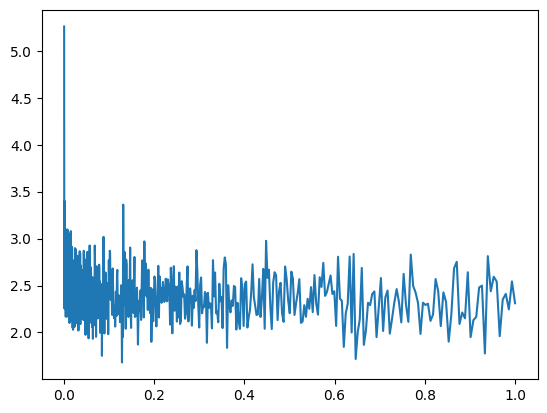

In [ ]:
plt.plot(lri, lossi)

But we would like to see which exponent value is recommended to use, so we'll update the x-axis

In [ ]:
g = torch.Generator().manual_seed(210102123)
C = torch.randn((27,2), generator=g)
W1 = torch.rand((6, 100), generator=g)
b1 = torch.rand(100, generator=g)
W2 = torch.rand((100, 27), generator=g)
b2 = torch.rand(27, generator=g)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True
lri = []
lossi = []

for i in range(1000):

    #Minibatch
    xi = torch.randint(0, X.shape[0], (32,))

    #forward pass
    emb = C[X[xi]]
    h = torch.tanh(emb.view(-1,6) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[xi])
    #print(loss.item())

    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    #update
    lr = lrs[i]
    for p in parameters:
        p.data += -0.1 * p.grad

    #keeping track
    lri.append(lre[i]) #We are taking the exponent of the learning rate for the x-axis
    lossi.append(loss.item())

print(loss.item())

2.1582908630371094


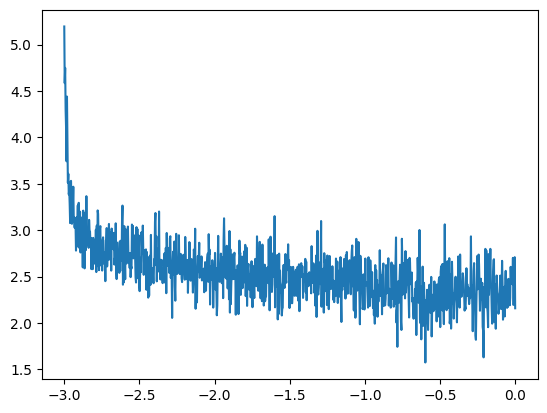

In [ ]:
plt.plot(lri, lossi)

^Here exp of `-1` is the closest to where the loss is less, so exponent of -1 is 0.1, which was the actual value we had considered anyway

Just to cross-check we'll directly plot that value and see

In [ ]:
#Remember to reset the parameters and only then run this

lri = []
lossi = []

for i in range(1000):

    #Minibatch
    xi = torch.randint(0, X.shape[0], (32,))

    #forward pass
    emb = C[X[xi]]
    h = torch.tanh(emb.view(-1,6) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[xi])
    #print(loss.item())

    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    #update
    lr = lrs[i]
    for p in parameters:
        p.data += -0.1 * p.grad

    #keeping track
    lri.append(lrs[i]) #We are taking the exponent of the learning rate for the x-axis
    lossi.append(loss.item())

print(loss.item())

2.5119123458862305


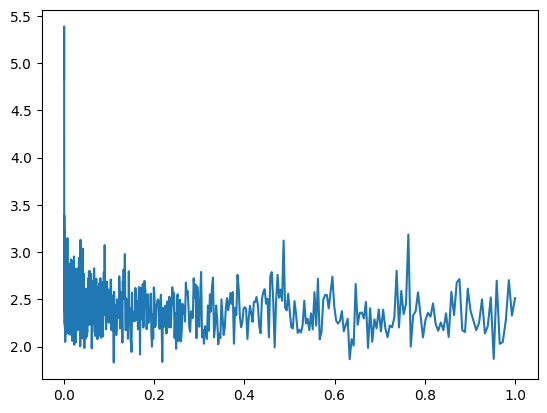

In [ ]:
plt.plot(lri, lossi)

Yeah `0.1` seems fair I guess lol

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [ ]:
# read in all the words
words = open('names.txt', 'r').read().splitlines()


# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [ ]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([390591, 3]) torch.Size([390591])
torch.Size([48694, 3]) torch.Size([48694])
torch.Size([48789, 3]) torch.Size([48789])


In [ ]:
Xtr.shape, Ytr.shape #dataset

(torch.Size([390591, 3]), torch.Size([390591]))

In [ ]:
g = torch.Generator().manual_seed(210102123) #For consistency ofcourse, to keep the same values as andrej
C = torch.randn((27,10), generator=g)
W1 = torch.rand((30, 300), generator=g)
b1 = torch.rand(300, generator=g)
W2 = torch.rand((300, 27), generator=g)
b2 = torch.rand(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [ ]:
sum(p.nelement() for p in parameters) # number of parameters in total

17697

In [ ]:
for p in parameters:
    p.requires_grad = True

In [ ]:

lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [ ]:
lri = []
lossi = []
stepi = []

for i in range(40000):

    #Minibatch
    xi = torch.randint(0, Xtr.shape[0], (32,))

    #forward pass
    emb = C[Xtr[xi]]
    h = torch.tanh(emb.view(-1,30) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[xi])
    #print(loss.item())

    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    #update
    #lr = lrs[i]
    lr = 0.01
    for p in parameters:
        p.data += -lr * p.grad

    #keeping track
    #lri.append(lr)
    stepi.append(i)
    lossi.append(loss.item())

#print(loss.item())

The above cell will take a couple of seconds to run. Training a neural net can take a while, but luckily this is a very small neural network.

**Evaluation:**

In [ ]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1,30) @ W1 + b1)
logits = h @ W2 + b2
devloss = F.cross_entropy(logits, Ydev)
devloss

tensor(2.0362, grad_fn=<NllLossBackward0>)

In [ ]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1,30) @ W1 + b1)
logits = h @ W2 + b2
trloss = F.cross_entropy(logits, Ytr)
trloss

tensor(2.0243, grad_fn=<NllLossBackward0>)

Training and Dev loss are almost the same. So we know we are not overfitting. But what it typically means is that the Neural Net is very small, so essentially it is underfitting the data. \
\
Therefore to improve the performance we'll need to increase the size of the neural net.

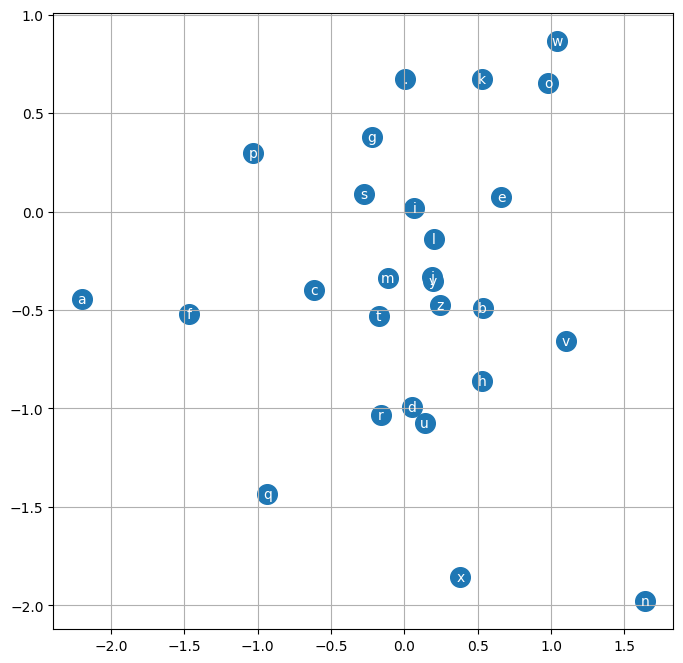

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i, 1].item(), itos[i], ha="center", va="center", color="white")
plt.grid('minor')

------------

-------------

Not much changes to what we have done so far, but just some code improvement for the lr value to change based on the iterations.

Here basically we are open to experimenting with different values, whether it is the inputs, size of the layers or the loss rate values to see how we can decrease the final loss value.



---



In [ ]:
g = torch.Generator().manual_seed(210102123) # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [ ]:
sum(p.nelement() for p in parameters) # number of parameters in total

11897

In [ ]:
for p in parameters:
  p.requires_grad = True

In [ ]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [ ]:
lri = []
lossi = []
stepi = []

In [ ]:
for i in range(200000):

  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))

  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 10)
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 200)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  #print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  #lr = lrs[i]
  lr = 0.1 if i < 100000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  #lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())

#print(loss.item())

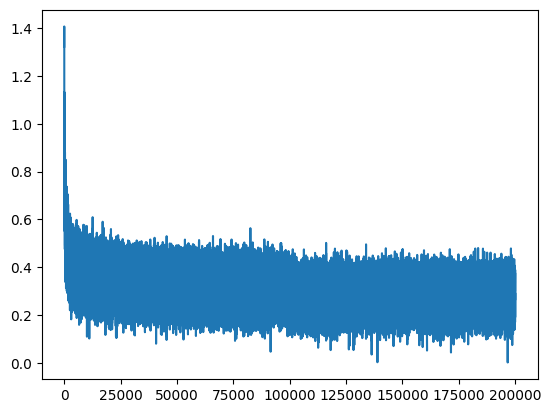

In [ ]:
plt.plot(stepi, lossi)

In [ ]:
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(1.9471, grad_fn=<NllLossBackward0>)

In [ ]:
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(1.9686, grad_fn=<NllLossBackward0>)

----

**Sampling from the model**

In [ ]:
context = [0] * block_size
C[torch.tensor([context])].shape

torch.Size([1, 3, 10])

Considering only one set of training set for simplicity rather than the entire training set^

In [ ]:
# sample from the model
g = torch.Generator().manual_seed(210102123 + 10)

for _ in range(20):

    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break

    print(''.join(itos[i] for i in out))

gen.
dar.
thrana.
pumanyakanundut.
resh.
jaya.
suri.
san.
chir.
chel.
gya.
shanesh.
lantra.
inderlalash.
dejethaithan.
aahpa.
harshanan.
vaanavyarjanithivakarapadhi.
aheebanaj.
idevana.


To be fair, most of them could make sense. But atleast this time they definetely sound more name like.

-----------